In [ ]:
### To-Do
# X) make fit_function general enough for pswarms optimization -> dropout rate, layers, nodes, etc
# X) write function that runs fit_function ~5 times and keeps ensemble + best
# X) put all this in a script
# X) save output distribution and history plots in model directory
# X) log file of some kind?
# X) e_sig vs (1-e_bkg) plot
# X) add sig text to preds plot
# X) implement pyswarms optimization
# -) ... 
# N) k-fold validation

In [1]:
import sys, os
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

In [2]:
from lorentzBoostAnalyzer import lorentzBoostAnalyzer as lba
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
import multiprocessing as mp

Using TensorFlow backend.


Dihiggs file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/pp2hh4b_500kEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv
QCD file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/ppTo4b_2MEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv


(array([3.3195e+04, 4.0870e+04, 2.5949e+04, 1.1225e+04, 3.8130e+03,
        1.1030e+03, 2.6100e+02, 5.6000e+01, 5.0000e+00, 4.0000e+00]),
 array([ 4. ,  4.9,  5.8,  6.7,  7.6,  8.5,  9.4, 10.3, 11.2, 12.1, 13. ]),
 <a list of 10 Patch objects>)

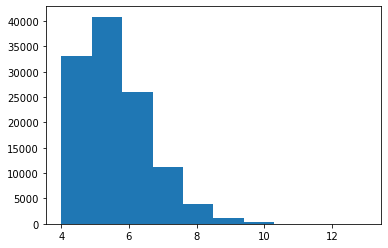

In [3]:
#*** 1. Import data and check stuff
testingFraction = 0.3

# *** A. Import Dataset
hh_raw, qcd_raw = importDatasets()

plt.hist(qcd_raw.nJets, bins=10)

In [4]:
userModelName = 'testPSO_v7'
test0 = lba(nJets=8, signalData= hh_raw, backgroundData = qcd_raw, modelName= userModelName, testingFraction=testingFraction)
test0.makeJetVectors()

N_sig = 78876 , N_bkg = 116481
195357 rows of total data with  195357 labels [Train+Test]
136749 rows of training data with  136749 labels [Train]
58608 rows of testing data with  58608 labels [Test]
(136749, 32)


In [5]:
# *** 1. Split testing data into signal and background samples                                                                                                                                             
#hh_data_test, hh_labels_test, qcd_data_test, qcd_labels_test = returnTestSamplesSplitIntoSignalAndBackground(self.testVectorsByEvent, self.testLabelsByEvent)

# """ 2. Make predictions                                                                                                                                                                                  
#pred_hh = _model.predict(np.array(hh_data_test))
#pred_qcd = _model.predict(np.array(qcd_data_test))

In [6]:
def f_LBN_swarm(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    
    n_particles = x.shape[0]
    #j = [forward_prop(x[i]) for i in range(n_particles)]
    j = [ test0.fit_swarm( epochs=50, batch_size=400, patience=10, 
                         model_hyperparams={'nodesInFirstHiddenLayer':int(x[i][0]), 'nodesInSecondHiddenLayer':int(x[i][1])
                                              }
                        ) 
         for i in range(n_particles) 
        ]
    
    return np.array(j)
    

2020-01-27 13:17:59,007 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 15.3 µs


pyswarms.single.global_best:   0%|          |0/10

<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nodesInFirstHiddenLayer = 42
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nodesInSecondHiddenLayer = 90
hiddenActivation = relu
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
outputActivation = sigmoid
nodesInFirstHiddenLayer = 186
nodesInSecondHiddenLayer = 190
lossFunction = binary_crossentropy
nodesInFirstHiddenLayer = 46
nodesInSecondHiddenLayer = 109
hiddenActivation = relu
nodesInSecondHiddenLayer = 4
hiddenActivation = relu
outputActivation = sigmoid
outputActivation = sigmoid
lossFunction = binary_crossentropy
hiddenActivation = relu
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy
+

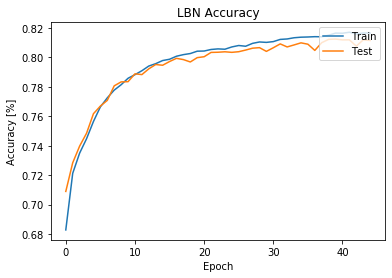

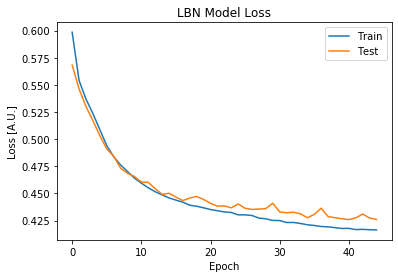

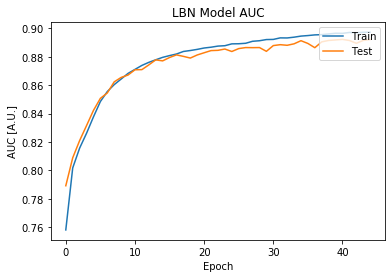

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step2/testPSO_v7_step2_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 186
nodesInSecondHiddenLayer = 4
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step2/testPSO_v7_step2.hdf5
Epoch 00046: early stopping


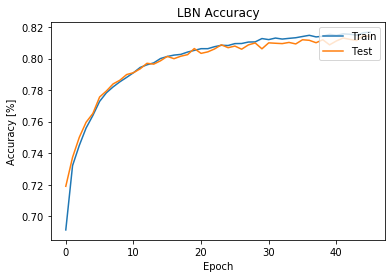

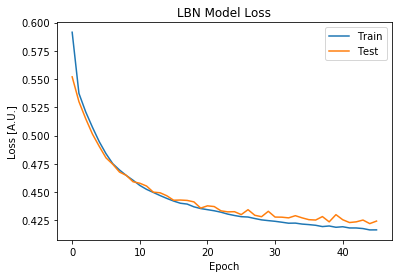

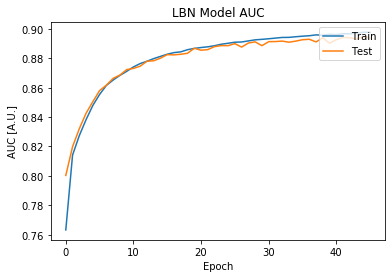

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step4/testPSO_v7_step4_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 46
nodesInSecondHiddenLayer = 109
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step4/testPSO_v7_step4.hdf5
(58608, 2)
++ Plotting test sample prediction results
(58608, 2)
23724 34884
++ Plotting test sample prediction results
23724 34884


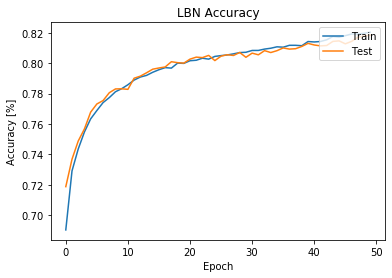

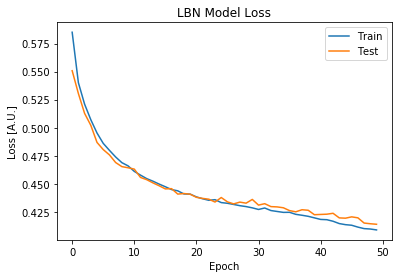

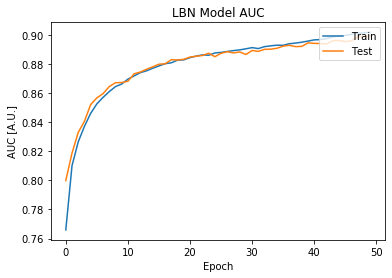

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step1/testPSO_v7_step1_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 42
nodesInSecondHiddenLayer = 90
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step1/testPSO_v7_step1.hdf5
(58608, 2)
Epoch 00046: early stopping


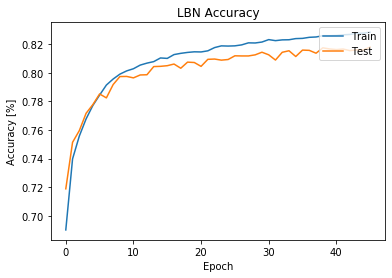

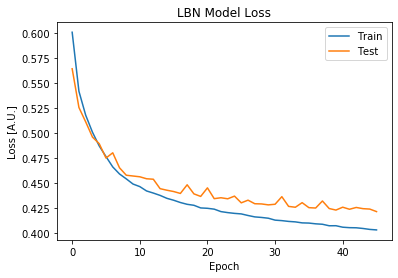

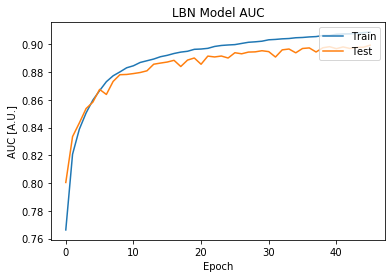

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step3/testPSO_v7_step3_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step3/testPSO_v7_step3.hdf5
++ Plotting test sample prediction results
23724 34884
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1833.73 , nBkg = 1336644.65 with significance = 1.586 +/- 0.037 for LBN Signal Score score > 0.868


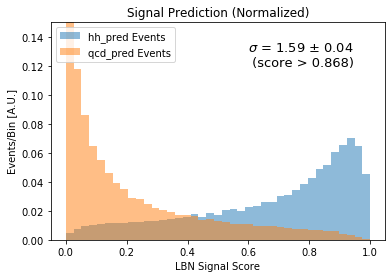

++ Making ROC curve


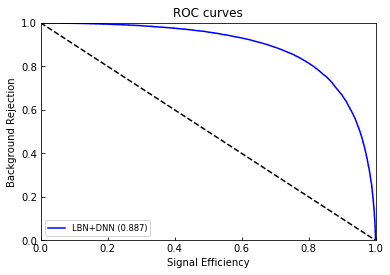

nSig = 900.8 , nBkg = 262910.27 with significance = 1.757 +/- 0.086 for LBN Signal Score score > 0.929
++ Calculating best significance
23724 34884


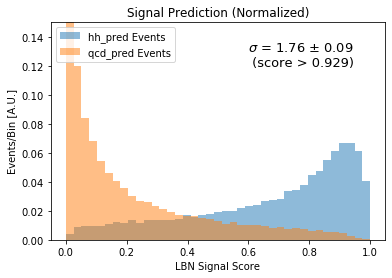

++ Making ROC curve


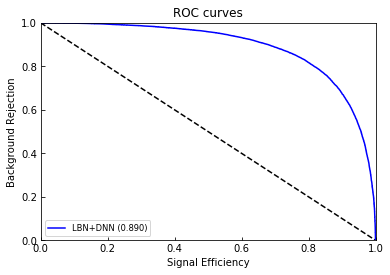

++ Calculating best significance
23724 34884
nSig = 1861.66 , nBkg = 1073734.38 with significance = 1.797 +/- 0.046 for LBN Signal Score score > 0.858


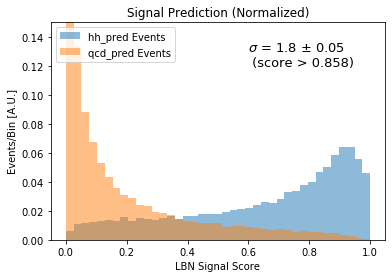

++ Making ROC curve


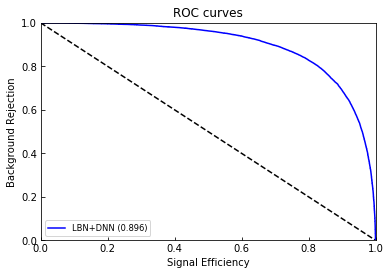

++ Calculating best significance
23724 34884
nSig = 2365.46 , nBkg = 1858046.53 with significance = 1.735 +/- 0.035 for LBN Signal Score score > 0.848


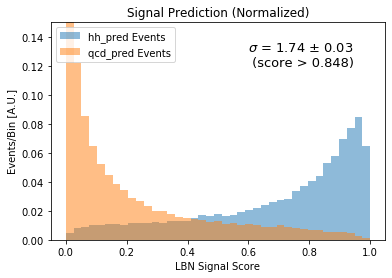

++ Making ROC curve


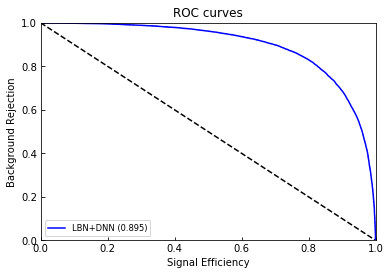

++ Calculating best significance
23724 34884
nSig = 1833.73 , nBkg = 1336644.65 with significance = 1.586 +/- 0.037 for ff-NN score > 0.868
nSig = 900.8 , nBkg = 262910.27 with significance = 1.757 +/- 0.086 for ff-NN score > 0.929
nSig = 1861.66 , nBkg = 1073734.38 with significance = 1.797 +/- 0.046 for ff-NN score > 0.858
nSig = 2365.46 , nBkg = 1858046.53 with significance = 1.735 +/- 0.035 for ff-NN score > 0.848


pyswarms.single.global_best:  10%|█         |1/10, best_cost=0.101

<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
++ Setting hyperparameters...
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 54
nLBNParticles = 5
++ Setting hyperparameters...
nodesInFirstHiddenLayer = 173
nodesInSecondHiddenLayer = 101
hiddenActivation = relu
nodesInSecondHiddenLayer = 26
nLBNParticles = 5
++ Setting hyperparameters...
hiddenActivation = relu
nLBNParticles = 5
nodesInFirstHiddenLayer = 55
outputActivation = sigmoid
outputActivation = sigmoid
nodesInFirstHiddenLayer = 120
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 131
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
hiddenActivation = relu
outputActivation = sigmoid
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy

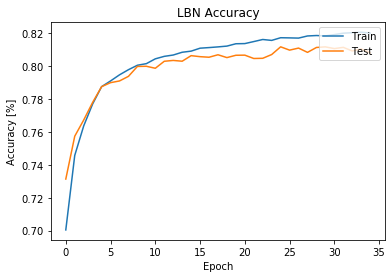

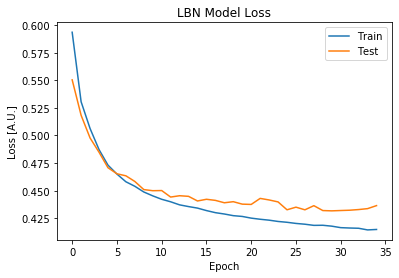

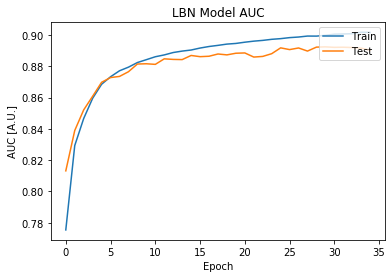

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step5/testPSO_v7_step5_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step5/testPSO_v7_step5.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00043: early stopping
Epoch 00043: early stopping


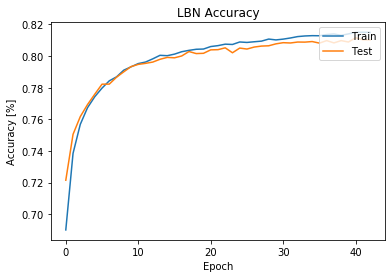

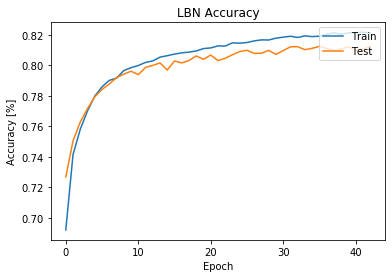

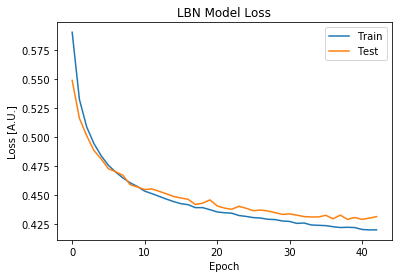

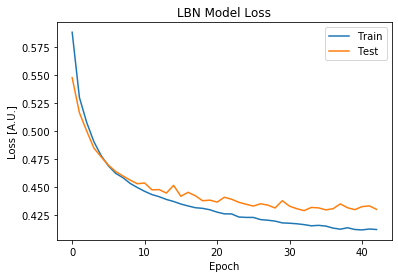

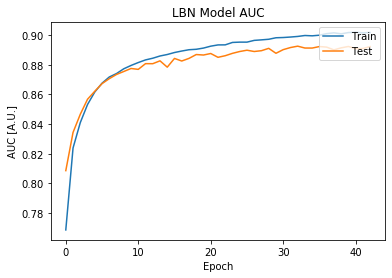

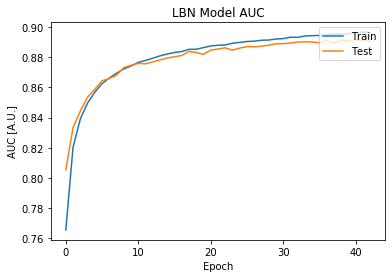

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step8/testPSO_v7_step8_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 173
nodesInSecondHiddenLayer = 26
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step8/testPSO_v7_step8.hdf5
++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step7/testPSO_v7_step7_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 55
nodesInSecondHiddenLayer = 131
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step7/testPSO_v7_step7.hdf5
(58608, 2)
(58608, 2

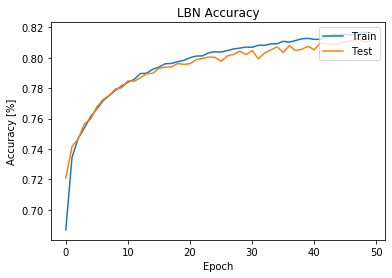

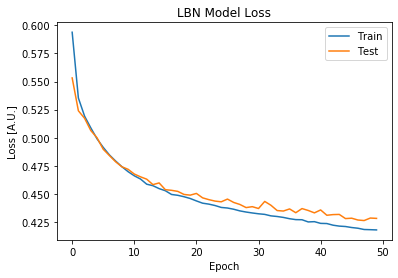

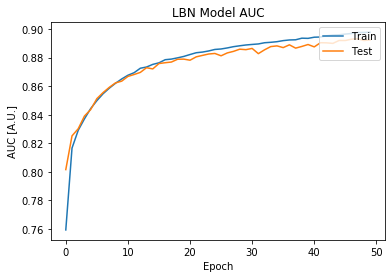

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step6/testPSO_v7_step6_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 54
nodesInSecondHiddenLayer = 101
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step6/testPSO_v7_step6.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1184.34 , nBkg = 463959.3 with significance = 1.739 +/- 0.065 for LBN Signal Score score > 0.909


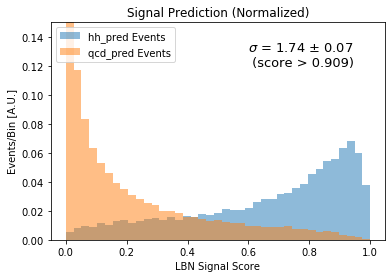

++ Making ROC curve


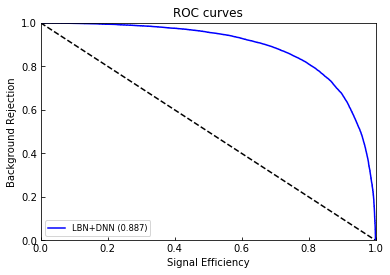

++ Calculating best significance
23724 34884
nSig = 1833.73 , nBkg = 1316760.68 with significance = 1.598 +/- 0.038 for LBN Signal Score score > 0.858
nSig = 2340.49 , nBkg = 2048048.91 with significance = 1.635 +/- 0.032 for LBN Signal Score score > 0.807


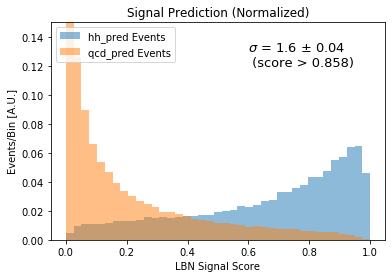

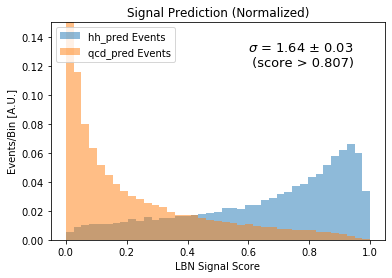

++ Making ROC curve
++ Making ROC curve


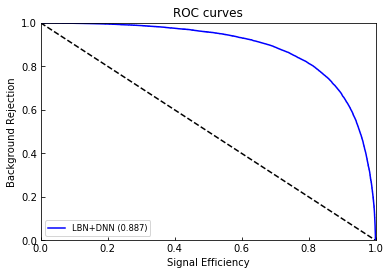

++ Calculating best significance
23724 34884


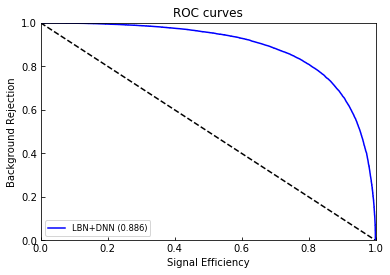

++ Calculating best significance
23724 34884
nSig = 1734.85 , nBkg = 1091409.02 with significance = 1.661 +/- 0.042 for LBN Signal Score score > 0.868


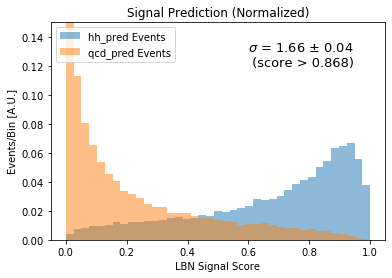

++ Making ROC curve


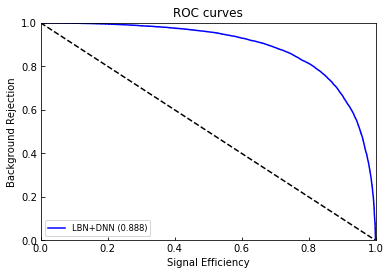

++ Calculating best significance
23724 34884
nSig = 1184.34 , nBkg = 463959.3 with significance = 1.739 +/- 0.065 for ff-NN score > 0.909
nSig = 2340.49 , nBkg = 2048048.91 with significance = 1.635 +/- 0.032 for ff-NN score > 0.807
nSig = 1833.73 , nBkg = 1316760.68 with significance = 1.598 +/- 0.038 for ff-NN score > 0.858
nSig = 1734.85 , nBkg = 1091409.02 with significance = 1.661 +/- 0.042 for ff-NN score > 0.868


pyswarms.single.global_best:  20%|██        |2/10, best_cost=0.101

<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 62
nLBNParticles = 5
nodesInFirstHiddenLayer = 65
nodesInSecondHiddenLayer = 157
nodesInSecondHiddenLayer = 125
nodesInFirstHiddenLayer = 153
hiddenActivation = relu
hiddenActivation = relu
nodesInSecondHiddenLayer = 79
nLBNParticles = 5
outputActivation = sigmoid
lossFunction = binary_crossentropy
hiddenActivation = relu
outputActivation = sigmoid
nodesInFirstHiddenLayer = 120
outputActivation = sigmoid
nodesInSecondHiddenLayer = 190
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy
hiddenActivation = relu
++ Begin model training

outputActivation = sigmoid
lossFunct

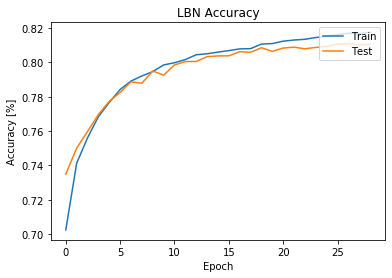

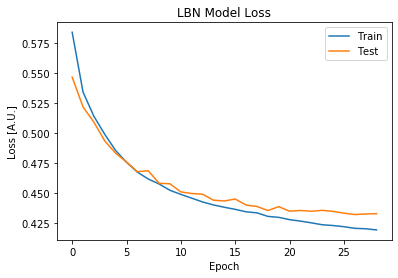

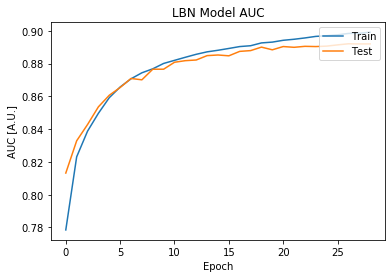

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step11/testPSO_v7_step11_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 153
nodesInSecondHiddenLayer = 79
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step11/testPSO_v7_step11.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00039: early stopping


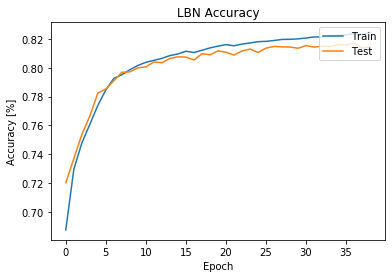

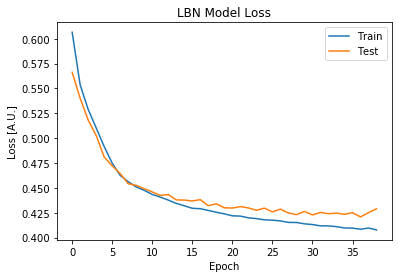

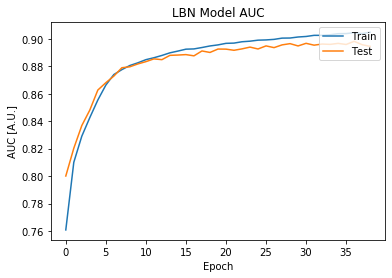

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step12/testPSO_v7_step12_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step12/testPSO_v7_step12.hdf5
Epoch 00042: early stopping


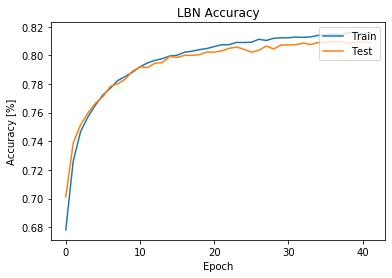

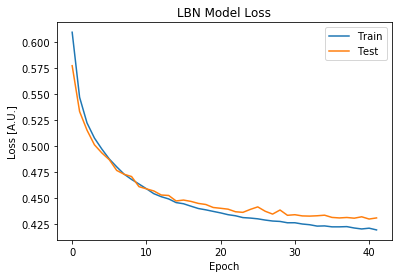

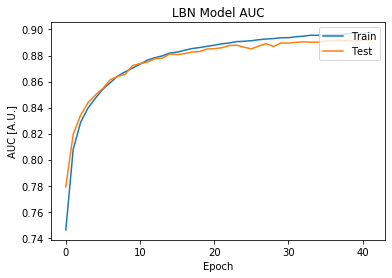

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step9/testPSO_v7_step9_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 65
nodesInSecondHiddenLayer = 125
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step9/testPSO_v7_step9.hdf5
(58608, 2)
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1437.22 , nBkg = 788730.81 with significance = 1.618 +/- 0.048 for LBN Signal Score score > 0.899


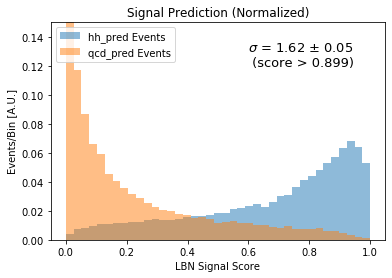

++ Making ROC curve
++ Plotting test sample prediction results
23724 34884


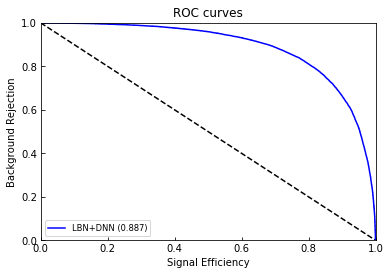

++ Calculating best significance
23724 34884
Epoch 00047: early stopping


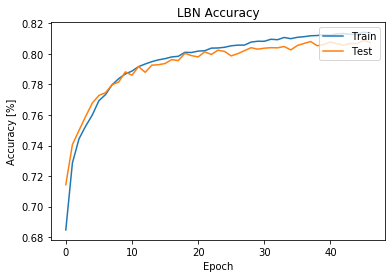

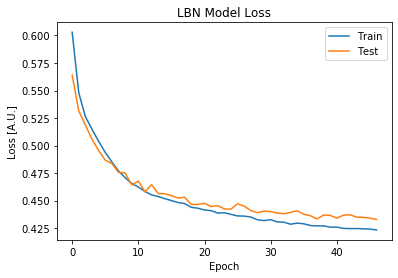

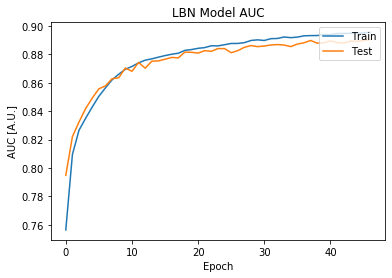

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step10/testPSO_v7_step10_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 62
nodesInSecondHiddenLayer = 157
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step10/testPSO_v7_step10.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1501.99 , nBkg = 673845.65 with significance = 1.83 +/- 0.057 for LBN Signal Score score > 0.888


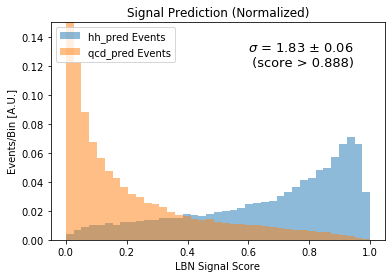

++ Making ROC curve
nSig = 1440.93 , nBkg = 729078.9 with significance = 1.688 +/- 0.051 for LBN Signal Score score > 0.899


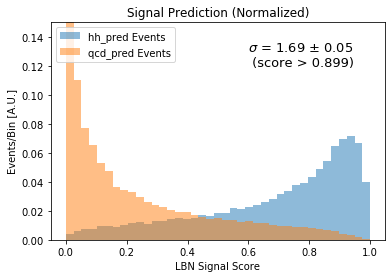

++ Making ROC curve


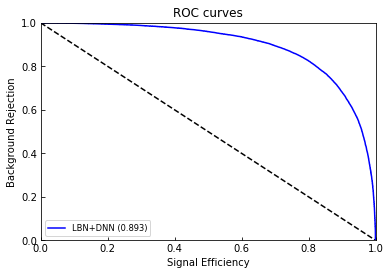

++ Calculating best significance
23724 34884
nSig = 1437.22 , nBkg = 788730.81 with significance = 1.618 +/- 0.048 for ff-NN score > 0.899


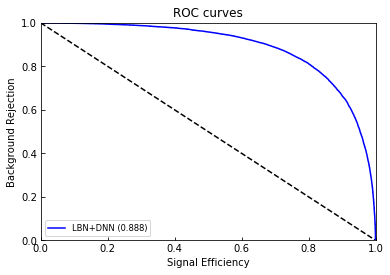

++ Calculating best significance
23724 34884
nSig = 1694.56 , nBkg = 1086990.36 with significance = 1.625 +/- 0.042 for LBN Signal Score score > 0.857


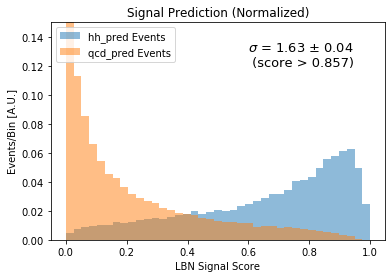

++ Making ROC curve


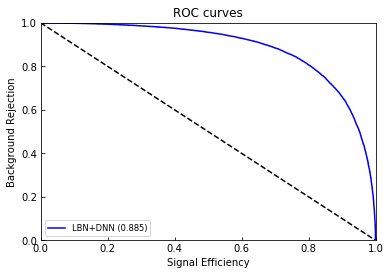

++ Calculating best significance
23724 34884
nSig = 1501.99 , nBkg = 673845.65 with significance = 1.83 +/- 0.057 for ff-NN score > 0.888
nSig = 1440.93 , nBkg = 729078.9 with significance = 1.688 +/- 0.051 for ff-NN score > 0.899
nSig = 1694.56 , nBkg = 1086990.36 with significance = 1.625 +/- 0.042 for ff-NN score > 0.857


pyswarms.single.global_best:  30%|███       |3/10, best_cost=0.101

<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 73
nodesInSecondHiddenLayer = 152
nodesInFirstHiddenLayer = 120
hiddenActivation = relu
nodesInSecondHiddenLayer = 190
outputActivation = sigmoid
lossFunction = binary_crossentropy
nLBNParticles = 5
hiddenActivation = relu
outputActivation = sigmoid
nodesInFirstHiddenLayer = 68
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 180
nLBNParticles = 5
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ Begin model training

nodesInFirstHiddenLayer = 138
nodesInSecondHiddenLayer = 118
++ Begin model training
hiddenActivation = relu

++ Begin m

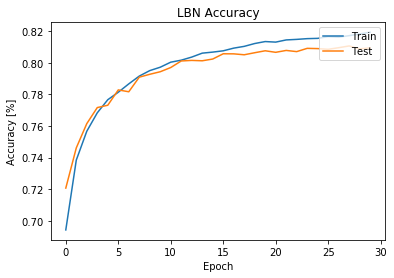

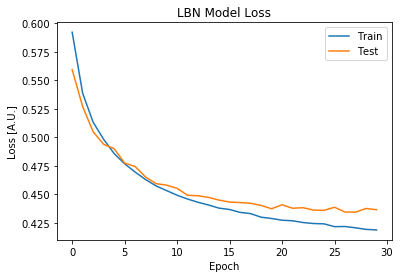

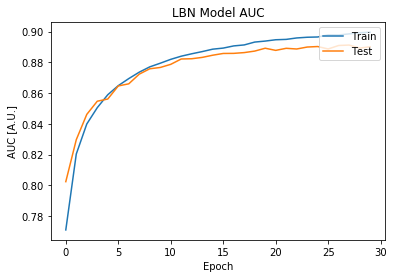

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step16/testPSO_v7_step16_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 138
nodesInSecondHiddenLayer = 118
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step16/testPSO_v7_step16.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00043: early stopping


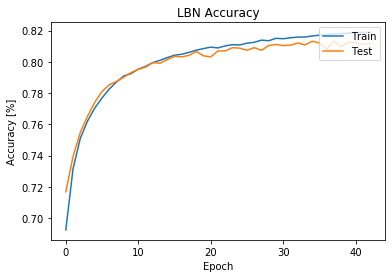

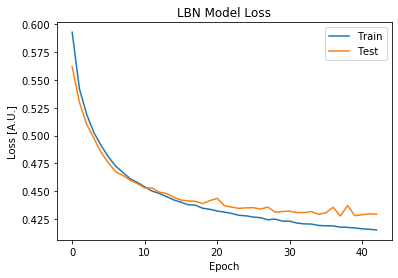

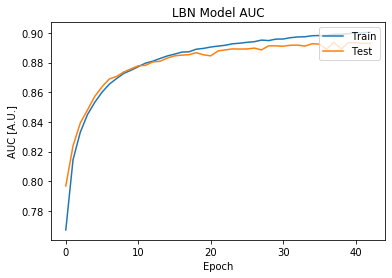

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step15/testPSO_v7_step15_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 73
nodesInSecondHiddenLayer = 152
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step15/testPSO_v7_step15.hdf5
(58608, 2)
Epoch 00045: early stopping


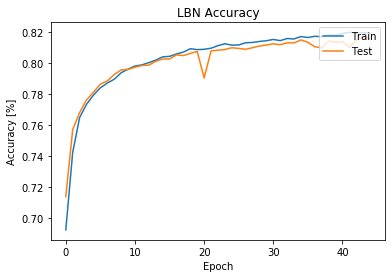

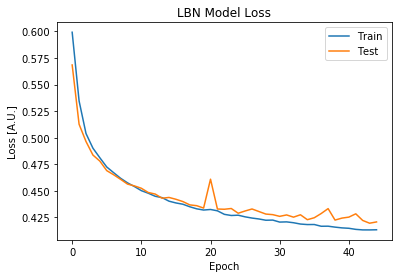

nSig = 2020.61 , nBkg = 1599554.92 with significance = 1.598 +/- 0.035 for LBN Signal Score score > 0.838


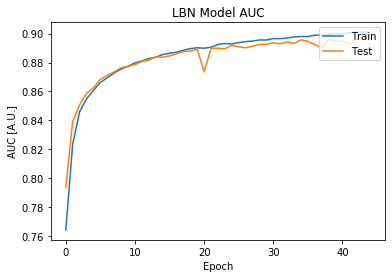

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step14/testPSO_v7_step14_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 68
nodesInSecondHiddenLayer = 180
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step14/testPSO_v7_step14.hdf5


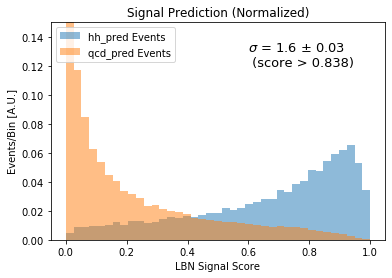

++ Plotting test sample prediction results
++ Making ROC curve
23724 34884


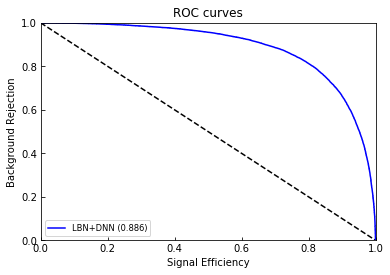

++ Calculating best significance
23724 34884
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00046: early stopping


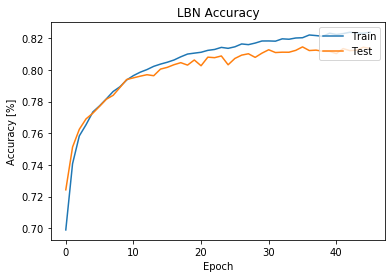

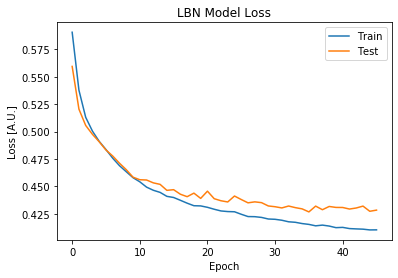

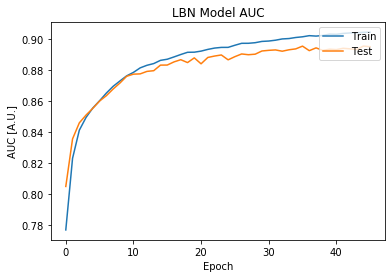

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step13/testPSO_v7_step13_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step13/testPSO_v7_step13.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 855.06 , nBkg = 236398.31 with significance = 1.759 +/- 0.09 for LBN Signal Score score > 0.929


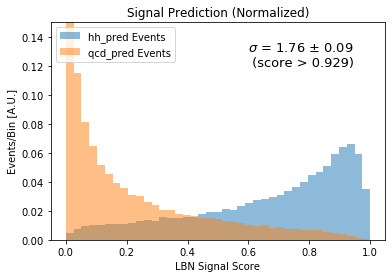

++ Making ROC curve


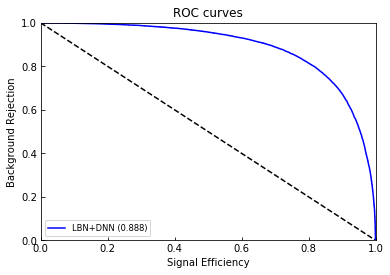

++ Calculating best significance
23724 34884
nSig = 2020.61 , nBkg = 1599554.92 with significance = 1.598 +/- 0.035 for ff-NN score > 0.838
nSig = 1412.75 , nBkg = 636287.04 with significance = 1.771 +/- 0.057 for LBN Signal Score score > 0.899


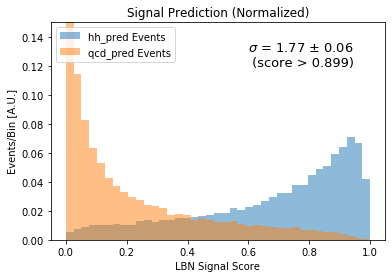

++ Making ROC curve


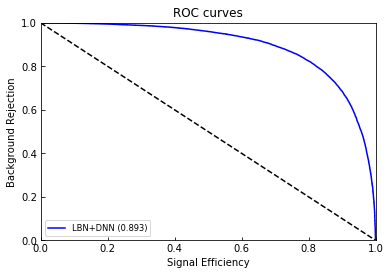

++ Calculating best significance
23724 34884
nSig = 1431.78 , nBkg = 695938.95 with significance = 1.716 +/- 0.053 for LBN Signal Score score > 0.899


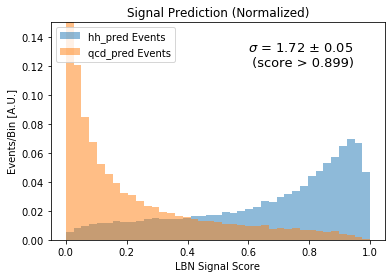

++ Making ROC curve


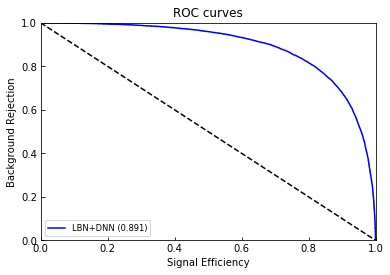

++ Calculating best significance
23724 34884
nSig = 855.06 , nBkg = 236398.31 with significance = 1.759 +/- 0.09 for ff-NN score > 0.929
nSig = 1412.75 , nBkg = 636287.04 with significance = 1.771 +/- 0.057 for ff-NN score > 0.899
nSig = 1431.78 , nBkg = 695938.95 with significance = 1.716 +/- 0.053 for ff-NN score > 0.899


pyswarms.single.global_best:  40%|████      |4/10, best_cost=0.101

<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nodesInSecondHiddenLayer = 171
nodesInFirstHiddenLayer = 90
nodesInFirstHiddenLayer = 120
nodesInFirstHiddenLayer = 127
nLBNParticles = 5
hiddenActivation = relu
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
nodesInSecondHiddenLayer = 137
outputActivation = sigmoid
outputActivation = sigmoid
nodesInFirstHiddenLayer = 77
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy
hiddenActivation = relu
nodesInSecondHiddenLayer = 1
hiddenActivation = relu
outputActivation = sigmoid
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy


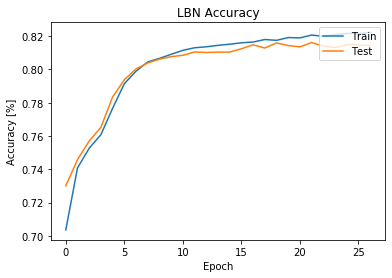

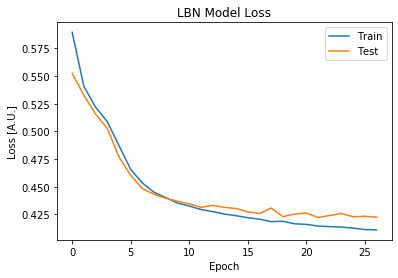

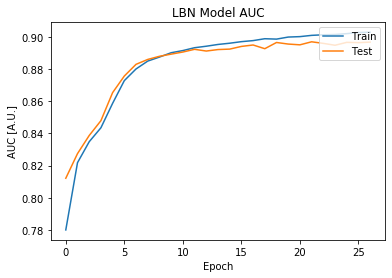

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step18/testPSO_v7_step18_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step18/testPSO_v7_step18.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00031: early stopping


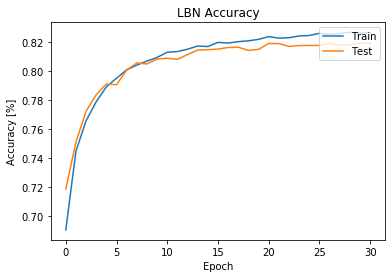

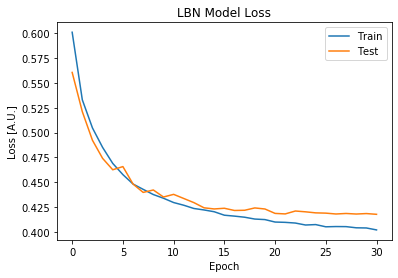

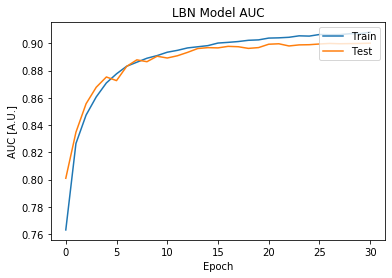

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step19/testPSO_v7_step19_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 127
nodesInSecondHiddenLayer = 137
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step19/testPSO_v7_step19.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1140.33 , nBkg = 404307.39 with significance = 1.793 +/- 0.071 for LBN Signal Score score > 0.909


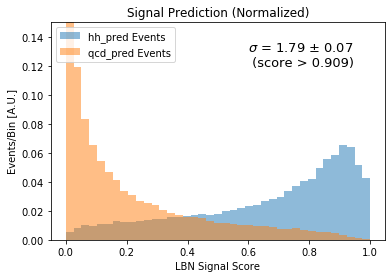

++ Making ROC curve


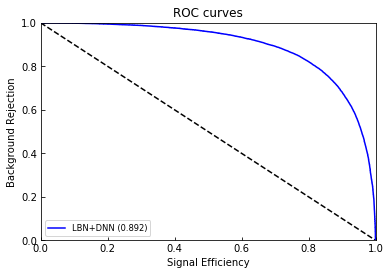

++ Calculating best significance
23724 34884


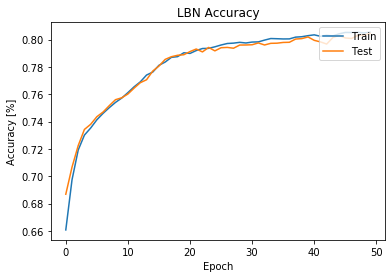

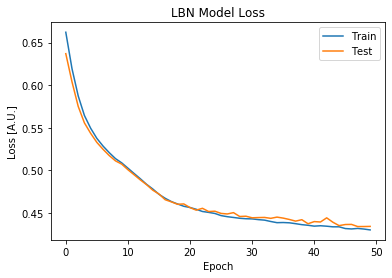

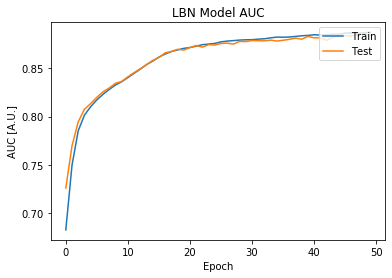

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step17/testPSO_v7_step17_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 77
nodesInSecondHiddenLayer = 1
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step17/testPSO_v7_step17.hdf5
(58608, 2)
nSig = 1307.19 , nBkg = 523611.21 with significance = 1.806 +/- 0.064 for LBN Signal Score score > 0.929


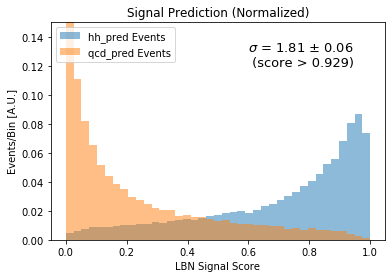

++ Making ROC curve
++ Plotting test sample prediction results
23724 34884
Epoch 00047: early stopping


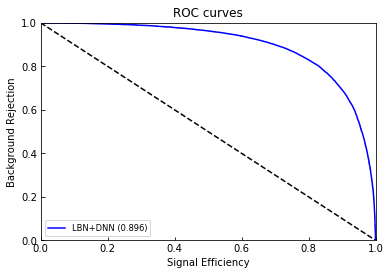

++ Calculating best significance
23724 34884


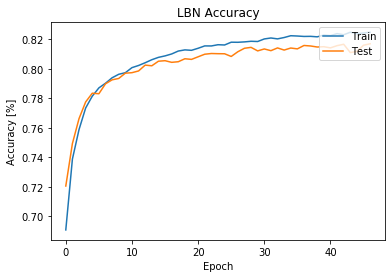

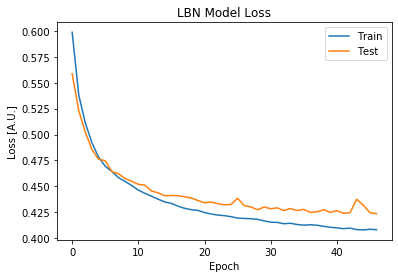

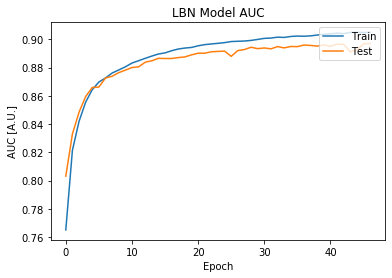

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step20/testPSO_v7_step20_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 90
nodesInSecondHiddenLayer = 171
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step20/testPSO_v7_step20.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1140.33 , nBkg = 404307.39 with significance = 1.793 +/- 0.071 for ff-NN score > 0.909
nSig = 2187.72 , nBkg = 2083398.19 with significance = 1.516 +/- 0.029 for LBN Signal Score score > 0.814


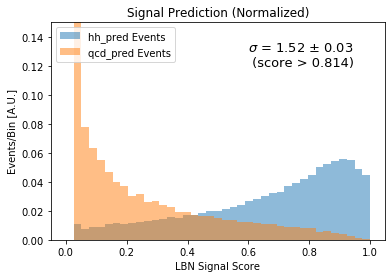

++ Making ROC curve
nSig = 1307.19 , nBkg = 523611.21 with significance = 1.806 +/- 0.064 for ff-NN score > 0.929


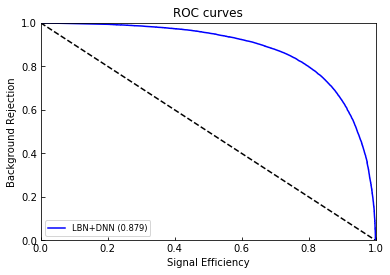

++ Calculating best significance
23724 34884
nSig = 1762.29 , nBkg = 987570.51 with significance = 1.773 +/- 0.047 for LBN Signal Score score > 0.878


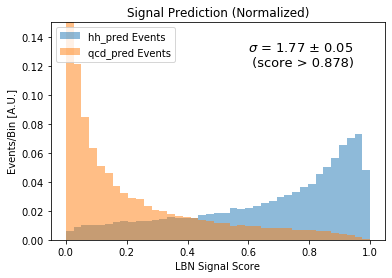

++ Making ROC curve


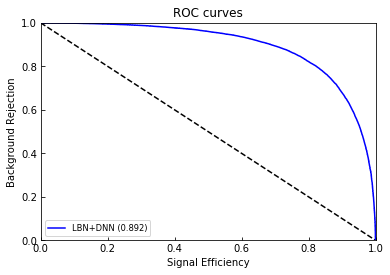

++ Calculating best significance
23724 34884
nSig = 2187.72 , nBkg = 2083398.19 with significance = 1.516 +/- 0.029 for ff-NN score > 0.814
nSig = 1762.29 , nBkg = 987570.51 with significance = 1.773 +/- 0.047 for ff-NN score > 0.878


pyswarms.single.global_best:  50%|█████     |5/10, best_cost=0.1  

<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 118
nodesInFirstHiddenLayer = 119
nodesInFirstHiddenLayer = 93
nodesInSecondHiddenLayer = 155
nodesInSecondHiddenLayer = 152
hiddenActivation = relu
nLBNParticles = 5
nodesInSecondHiddenLayer = 183
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy
nodesInFirstHiddenLayer = 88
hiddenActivation = relu
nodesInSecondHiddenLayer = 61
hiddenActivation = relu
outputActivation = sigmoid
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy

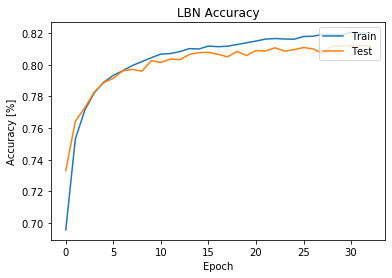

Epoch 00033: early stopping


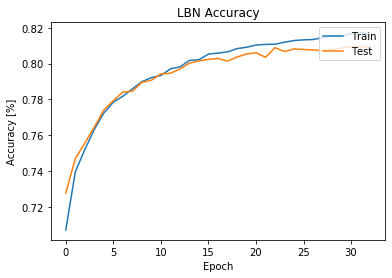

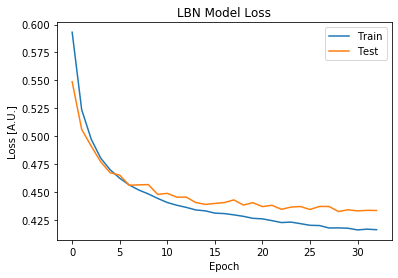

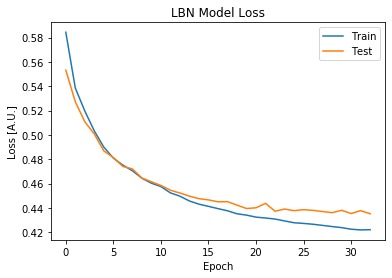

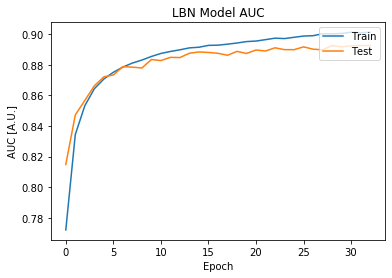

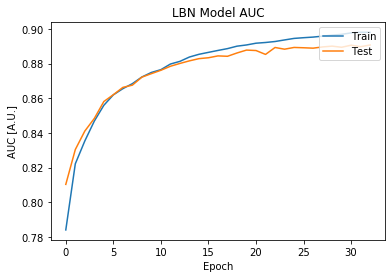

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step23/testPSO_v7_step23_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 118
nodesInSecondHiddenLayer = 155
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step23/testPSO_v7_step23.hdf5
++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step21/testPSO_v7_step21_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 119
nodesInSecondHiddenLayer = 183
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step21/testPSO_v7_step21.hdf5
(58608, 2)

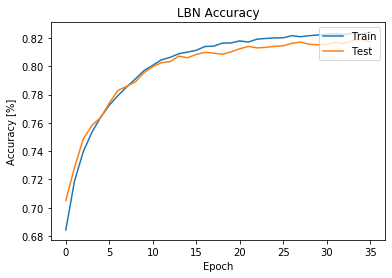

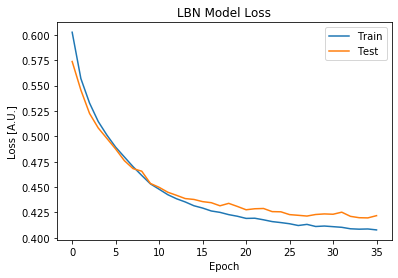

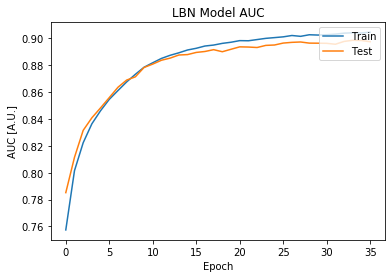

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step22/testPSO_v7_step22_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 93
nodesInSecondHiddenLayer = 152
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step22/testPSO_v7_step22.hdf5
++ Plotting test sample prediction results
23724 34884
++ Plotting test sample prediction results
23724 34884
(58608, 2)
Epoch 00040: early stopping


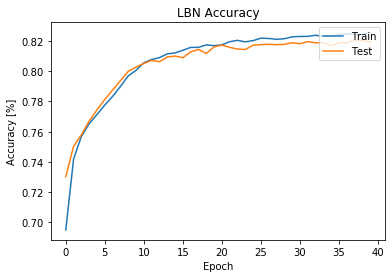

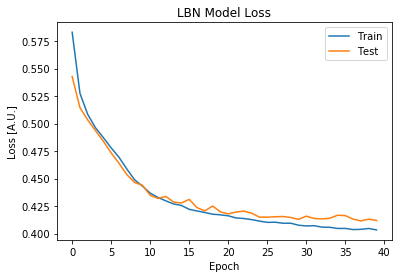

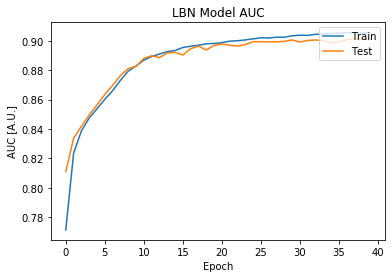

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step24/testPSO_v7_step24_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 88
nodesInSecondHiddenLayer = 61
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step24/testPSO_v7_step24.hdf5
++ Plotting test sample prediction results
23724 34884
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1643.63 , nBkg = 978733.19 with significance = 1.661 +/- 0.044 for LBN Signal Score score > 0.879


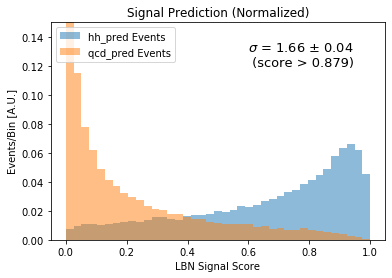

nSig = 1414.23 , nBkg = 706985.6 with significance = 1.682 +/- 0.052 for LBN Signal Score score > 0.909


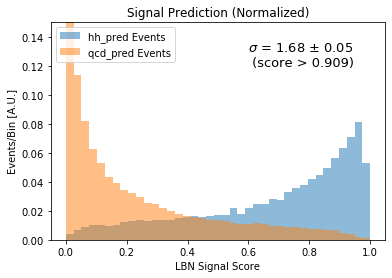

++ Making ROC curve
++ Making ROC curve
nSig = 1249.35 , nBkg = 455121.98 with significance = 1.852 +/- 0.07 for LBN Signal Score score > 0.909


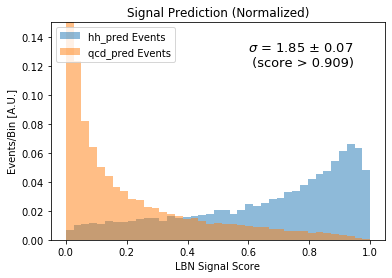

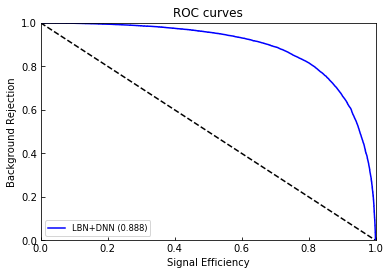

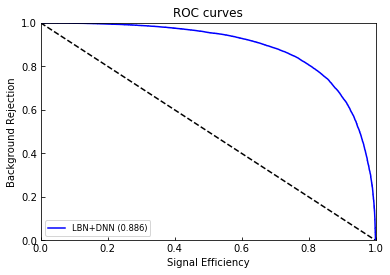

++ Calculating best significance
++ Making ROC curve
23724 34884
++ Calculating best significance
23724 34884


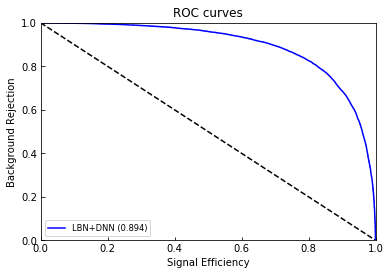

++ Calculating best significance
23724 34884
nSig = 923.79 , nBkg = 258491.61 with significance = 1.817 +/- 0.089 for LBN Signal Score score > 0.939


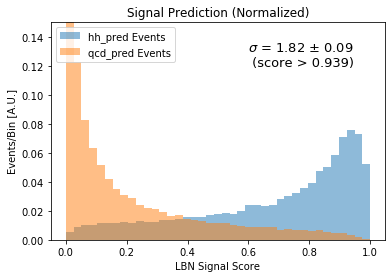

++ Making ROC curve


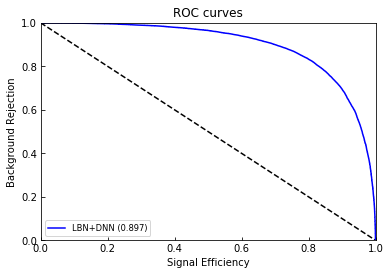

++ Calculating best significance
23724 34884
nSig = 1643.63 , nBkg = 978733.19 with significance = 1.661 +/- 0.044 for ff-NN score > 0.879
nSig = 1414.23 , nBkg = 706985.6 with significance = 1.682 +/- 0.052 for ff-NN score > 0.909
nSig = 1249.35 , nBkg = 455121.98 with significance = 1.852 +/- 0.07 for ff-NN score > 0.909
nSig = 923.79 , nBkg = 258491.61 with significance = 1.817 +/- 0.089 for ff-NN score > 0.939


pyswarms.single.global_best:  60%|██████    |6/10, best_cost=0.0984

<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 111
nodesInFirstHiddenLayer = 82
nodesInSecondHiddenLayer = 140
++ Setting hyperparameters...
hiddenActivation = relu
nodesInSecondHiddenLayer = 100
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 111
nodesInFirstHiddenLayer = 98
nodesInSecondHiddenLayer = 176
outputActivation = sigmoid
hiddenActivation = relu
nodesInSecondHiddenLayer = 115
hiddenActivation = relu
lossFunction = binary_crossentropy
outputActivation = sigmoid
outputActivation = sigmoid
hiddenActivation = relu
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentrop

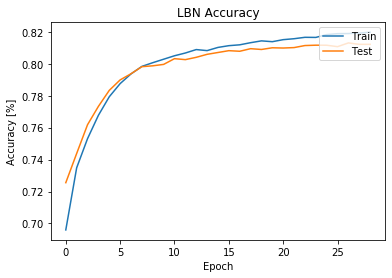

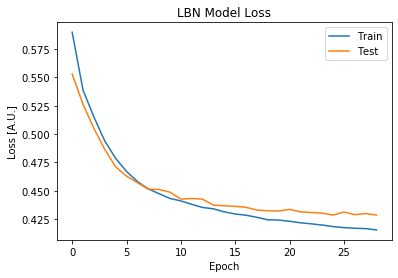

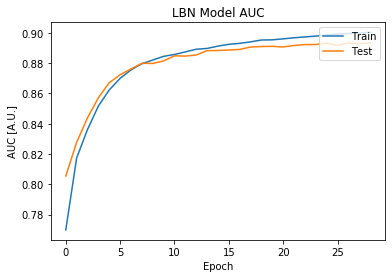

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step28/testPSO_v7_step28_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 98
nodesInSecondHiddenLayer = 115
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step28/testPSO_v7_step28.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00040: early stopping


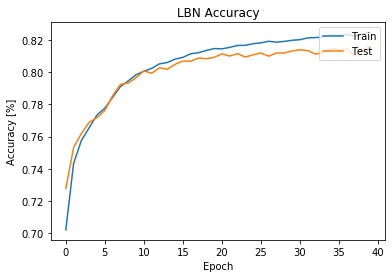

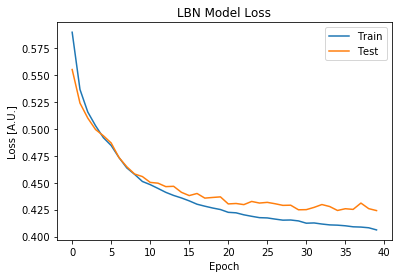

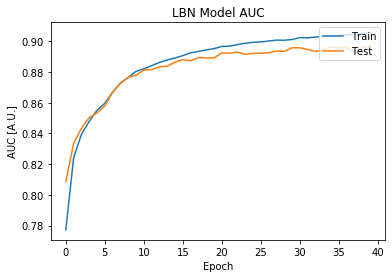

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step26/testPSO_v7_step26_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 111
nodesInSecondHiddenLayer = 176
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step26/testPSO_v7_step26.hdf5
nSig = 1306.95 , nBkg = 603147.09 with significance = 1.683 +/- 0.056 for LBN Signal Score score > 0.909


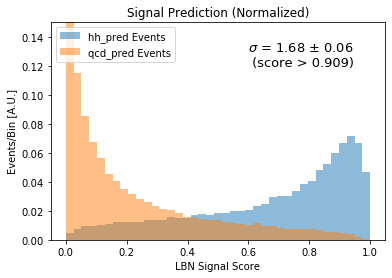

Epoch 00042: early stopping
++ Making ROC curve


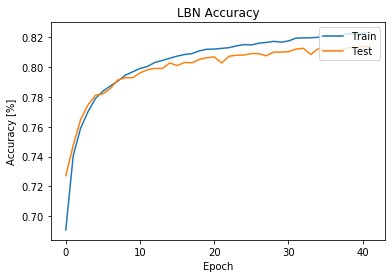

(58608, 2)


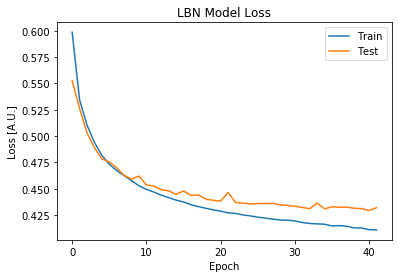

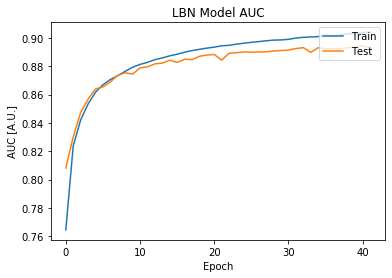

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step25/testPSO_v7_step25_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 111
nodesInSecondHiddenLayer = 140
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step25/testPSO_v7_step25.hdf5


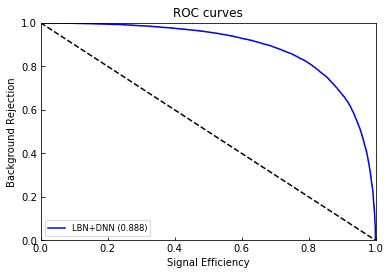

++ Calculating best significance
23724 34884
++ Plotting test sample prediction results
23724 34884
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00049: early stopping


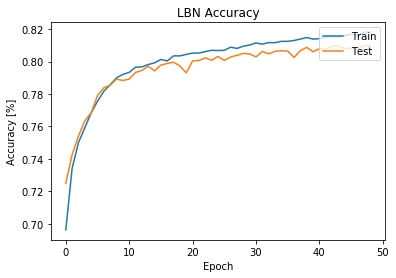

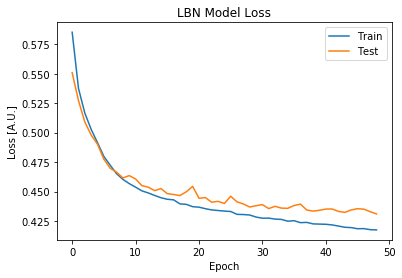

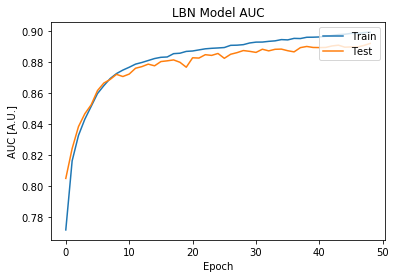

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step27/testPSO_v7_step27_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 82
nodesInSecondHiddenLayer = 100
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step27/testPSO_v7_step27.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 1124.76 , nBkg = 413144.71 with significance = 1.75 +/- 0.069 for LBN Signal Score score > 0.928


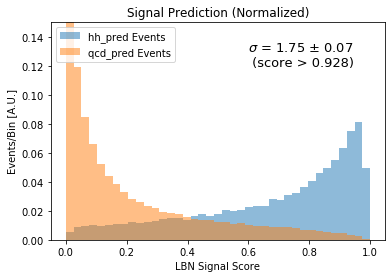

++ Making ROC curve
nSig = 1306.95 , nBkg = 603147.09 with significance = 1.683 +/- 0.056 for ff-NN score > 0.909


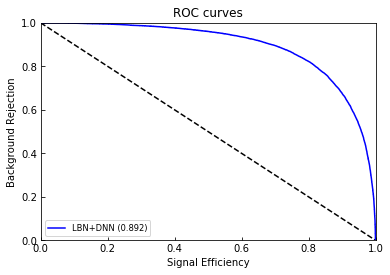

++ Calculating best significance
23724 34884
nSig = 816.75 , nBkg = 236398.31 with significance = 1.68 +/- 0.086 for LBN Signal Score score > 0.949


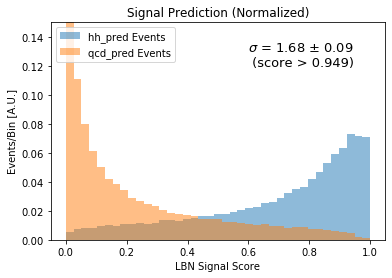

++ Making ROC curve


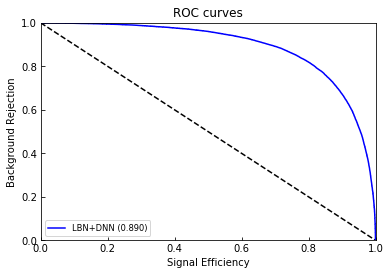

++ Calculating best significance
23724 34884
nSig = 1696.29 , nBkg = 1095827.68 with significance = 1.62 +/- 0.041 for LBN Signal Score score > 0.889


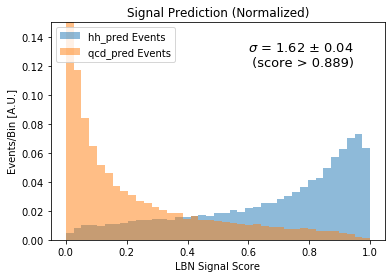

++ Making ROC curve


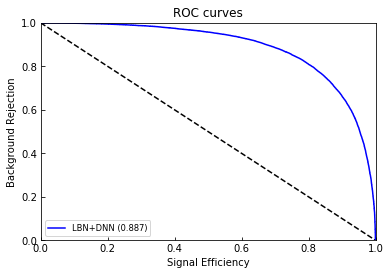

++ Calculating best significance
23724 34884
nSig = 1124.76 , nBkg = 413144.71 with significance = 1.75 +/- 0.069 for ff-NN score > 0.928
nSig = 816.75 , nBkg = 236398.31 with significance = 1.68 +/- 0.086 for ff-NN score > 0.949
nSig = 1696.29 , nBkg = 1095827.68 with significance = 1.62 +/- 0.041 for ff-NN score > 0.889


pyswarms.single.global_best:  70%|███████   |7/10, best_cost=0.0984

<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 104
nodesInFirstHiddenLayer = 54
nodesInFirstHiddenLayer = 103
nodesInSecondHiddenLayer = 50
nodesInFirstHiddenLayer = 105
nodesInSecondHiddenLayer = 166
hiddenActivation = relu
hiddenActivation = relu
nodesInSecondHiddenLayer = 140
hiddenActivation = relu
outputActivation = sigmoid
outputActivation = sigmoid
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 107
lossFunction = binary_crossentropy
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentrop

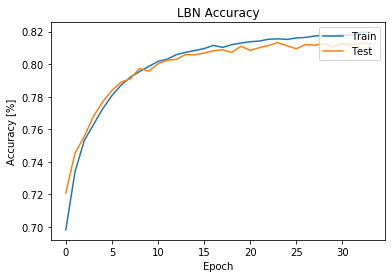

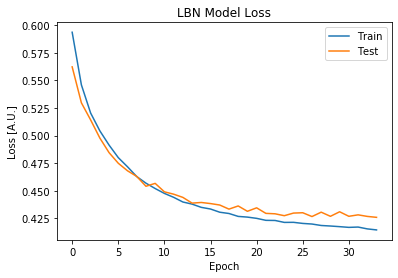

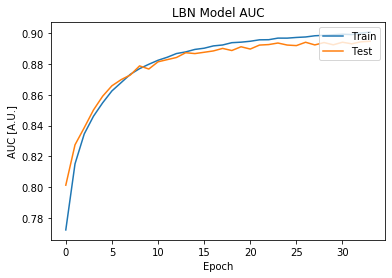

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step29/testPSO_v7_step29_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 104
nodesInSecondHiddenLayer = 166
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step29/testPSO_v7_step29.hdf5
Epoch 00036: early stopping


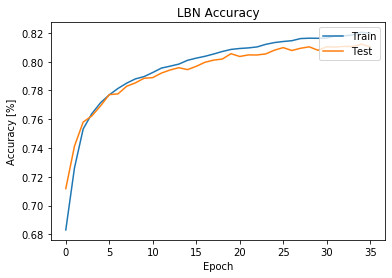

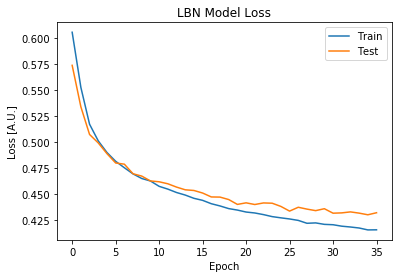

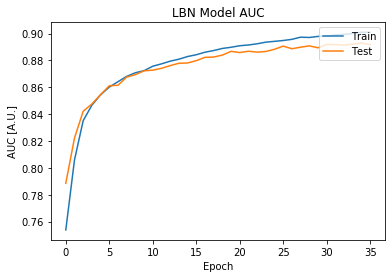

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step30/testPSO_v7_step30_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 103
nodesInSecondHiddenLayer = 107
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step30/testPSO_v7_step30.hdf5
(58608, 2)
Epoch 00041: early stopping


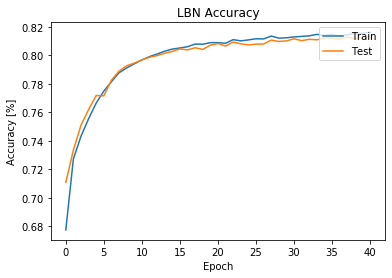

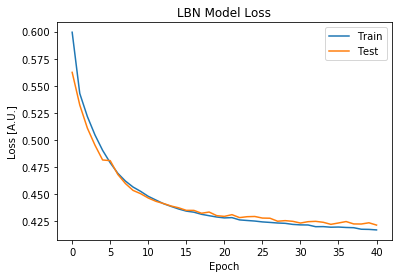

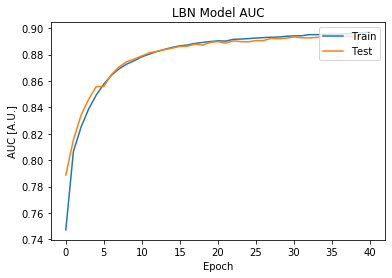

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step32/testPSO_v7_step32_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 54
nodesInSecondHiddenLayer = 50
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step32/testPSO_v7_step32.hdf5
++ Plotting test sample prediction results
23724 34884
(58608, 2)
(58608, 2)
++ Plotting test sample prediction results
23724 34884
++ Plotting test sample prediction results
23724 34884
Epoch 00044: early stopping


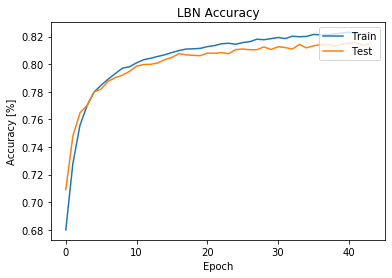

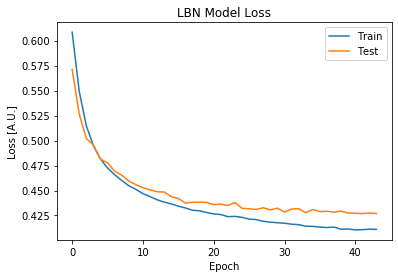

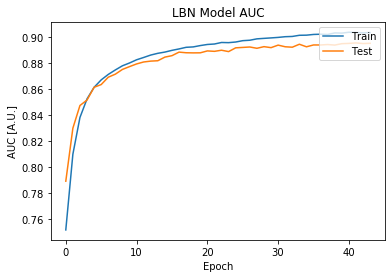

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step31/testPSO_v7_step31_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 105
nodesInSecondHiddenLayer = 140
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step31/testPSO_v7_step31.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 2098.98 , nBkg = 1513391.05 with significance = 1.706 +/- 0.037 for LBN Signal Score score > 0.818


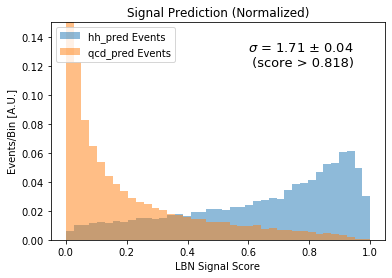

++ Making ROC curve


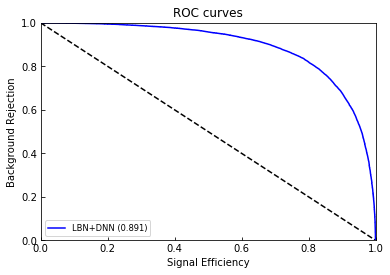

++ Calculating best significance
23724 34884
nSig = 1177.41 , nBkg = 481633.94 with significance = 1.697 +/- 0.062 for LBN Signal Score score > 0.919


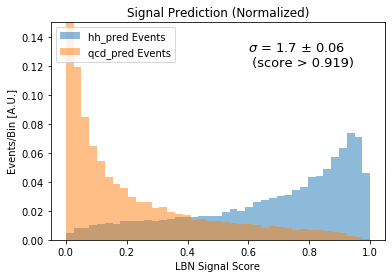

++ Making ROC curve
nSig = 928.24 , nBkg = 291631.56 with significance = 1.719 +/- 0.08 for LBN Signal Score score > 0.929


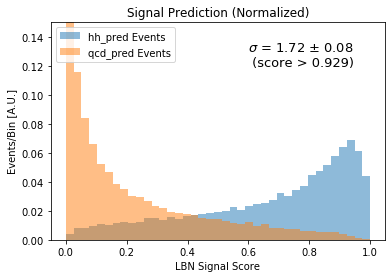

++ Making ROC curve


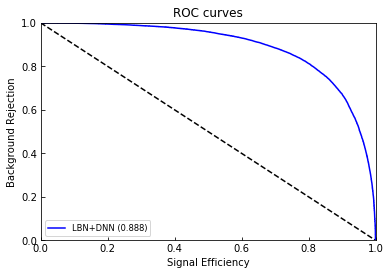

++ Calculating best significance
23724 34884


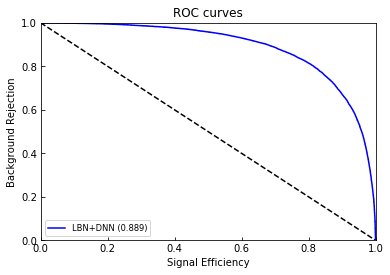

++ Calculating best significance
23724 34884
nSig = 1639.92 , nBkg = 921290.61 with significance = 1.709 +/- 0.047 for LBN Signal Score score > 0.878


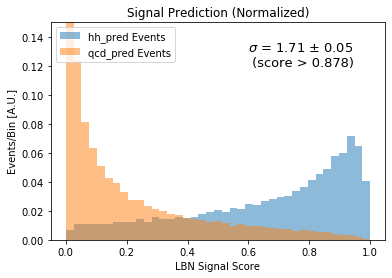

++ Making ROC curve


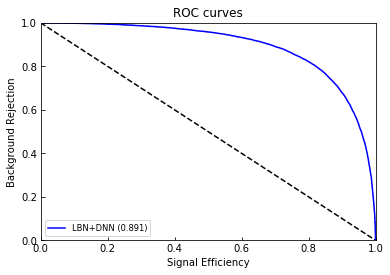

++ Calculating best significance
23724 34884
nSig = 2098.98 , nBkg = 1513391.05 with significance = 1.706 +/- 0.037 for ff-NN score > 0.818
nSig = 1177.41 , nBkg = 481633.94 with significance = 1.697 +/- 0.062 for ff-NN score > 0.919
nSig = 928.24 , nBkg = 291631.56 with significance = 1.719 +/- 0.08 for ff-NN score > 0.929
nSig = 1639.92 , nBkg = 921290.61 with significance = 1.709 +/- 0.047 for ff-NN score > 0.878


pyswarms.single.global_best:  80%|████████  |8/10, best_cost=0.0984

<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
++ Setting hyperparameters...
nodesInFirstHiddenLayer = 95
nLBNParticles = 5
nodesInSecondHiddenLayer = 129
nLBNParticles = 5
hiddenActivation = relu
nLBNParticles = 5
nodesInFirstHiddenLayer = 94
nodesInSecondHiddenLayer = 78
outputActivation = sigmoid
hiddenActivation = relu
lossFunction = binary_crossentropy
nodesInFirstHiddenLayer = 31
nodesInFirstHiddenLayer = 106
outputActivation = sigmoid
nodesInSecondHiddenLayer = 136
nodesInSecondHiddenLayer = 7
lossFunction = binary_crossentropy
hiddenActivation = relu
hiddenActivation = relu
outputActivation = sigmoid
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy
++

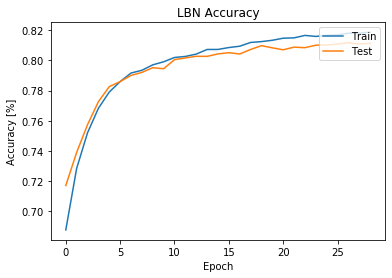

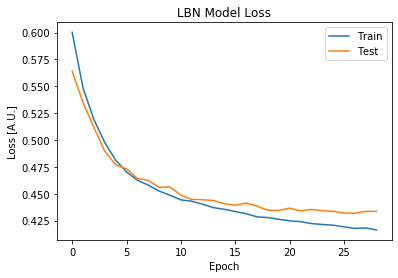

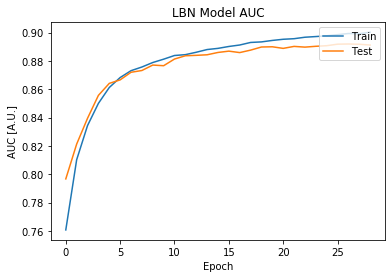

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step35/testPSO_v7_step35_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 106
nodesInSecondHiddenLayer = 136
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step35/testPSO_v7_step35.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 979.65 , nBkg = 342446.15 with significance = 1.674 +/- 0.072 for LBN Signal Score score > 0.929


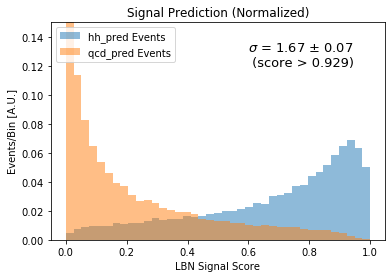

++ Making ROC curve


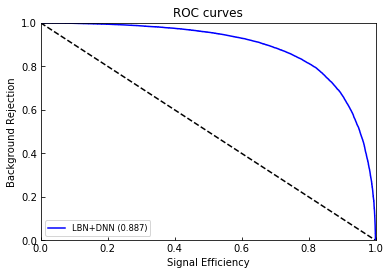

++ Calculating best significance
23724 34884


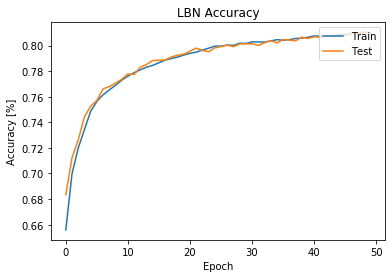

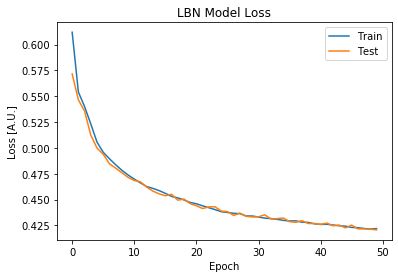

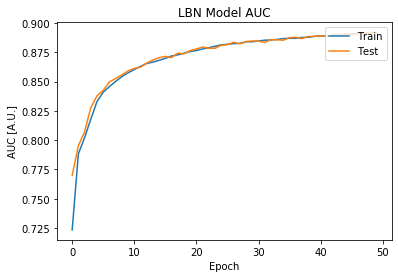

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step33/testPSO_v7_step33_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 31
nodesInSecondHiddenLayer = 7
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step33/testPSO_v7_step33.hdf5
(58608, 2)
++ Plotting test sample prediction results
23724 34884
Epoch 00048: early stopping


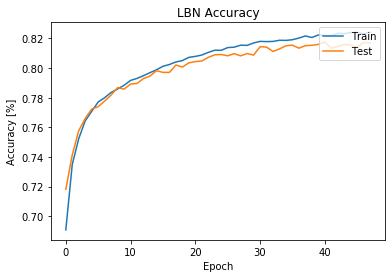

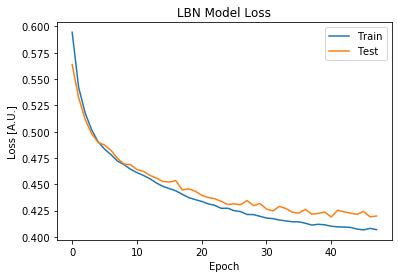

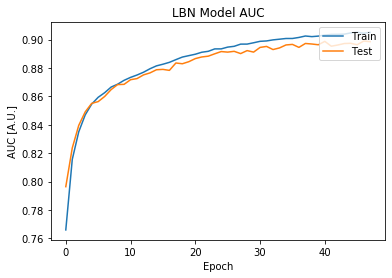

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step36/testPSO_v7_step36_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 95
nodesInSecondHiddenLayer = 129
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step36/testPSO_v7_step36.hdf5


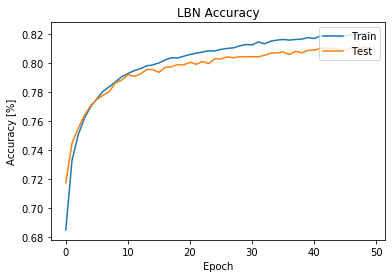

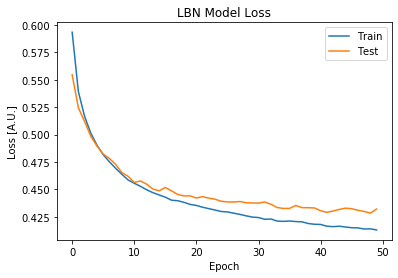

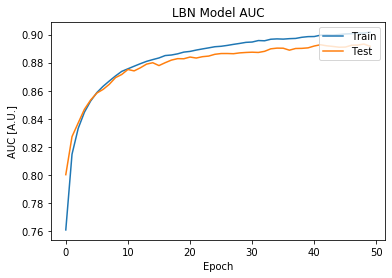

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step34/testPSO_v7_step34_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 94
nodesInSecondHiddenLayer = 78
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step34/testPSO_v7_step34.hdf5
(58608, 2)
(58608, 2)
++ Plotting test sample prediction results
23724 34884
++ Plotting test sample prediction results
23724 34884
nSig = 979.65 , nBkg = 342446.15 with significance = 1.674 +/- 0.072 for ff-NN score > 0.929
nSig = 1674.29 , nBkg = 1098037.01 with significance = 1.598 +/- 0.041 for LBN Signal Score score > 0.879


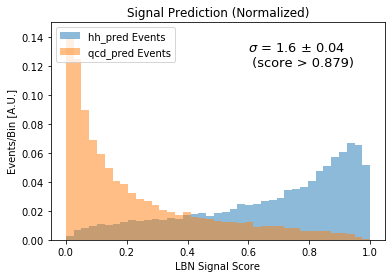

++ Making ROC curve


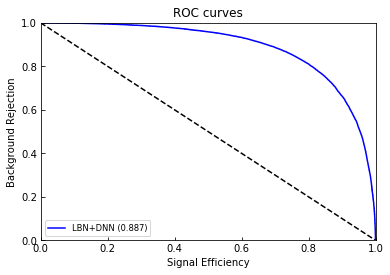

++ Calculating best significance
23724 34884
nSig = 1697.03 , nBkg = 914662.62 with significance = 1.774 +/- 0.049 for LBN Signal Score score > 0.878


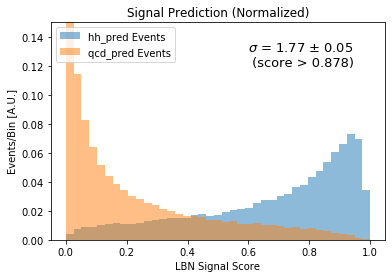

++ Making ROC curve


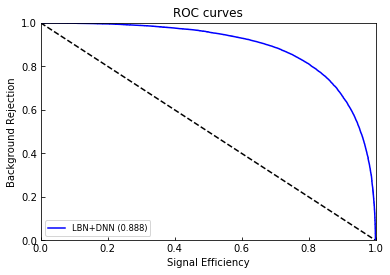

++ Calculating best significance
23724 34884
nSig = 1420.66 , nBkg = 645124.36 with significance = 1.769 +/- 0.057 for LBN Signal Score score > 0.909


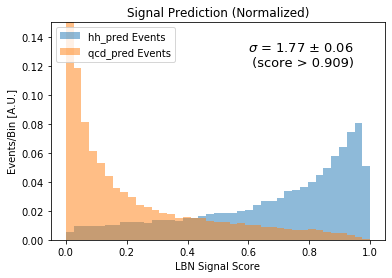

++ Making ROC curve


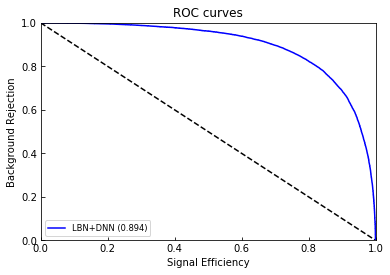

++ Calculating best significance
23724 34884
nSig = 1674.29 , nBkg = 1098037.01 with significance = 1.598 +/- 0.041 for ff-NN score > 0.879
nSig = 1697.03 , nBkg = 914662.62 with significance = 1.774 +/- 0.049 for ff-NN score > 0.878
nSig = 1420.66 , nBkg = 645124.36 with significance = 1.769 +/- 0.057 for ff-NN score > 0.909


pyswarms.single.global_best:  90%|█████████ |9/10, best_cost=0.0984

<ForkProcess(ForkPoolWorker-1, started daemon)> 12475 1
<ForkProcess(ForkPoolWorker-3, started daemon)> 12477 3
<ForkProcess(ForkPoolWorker-2, started daemon)> 12476 2
<ForkProcess(ForkPoolWorker-4, started daemon)> 12478 4
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
++ Setting hyperparameters...
++ Setting hyperparameters...
nodesInFirstHiddenLayer = 11
nLBNParticles = 5
nodesInFirstHiddenLayer = 101
nLBNParticles = 5
nodesInSecondHiddenLayer = 65
nodesInFirstHiddenLayer = 98
nodesInSecondHiddenLayer = 8
hiddenActivation = relu
nLBNParticles = 5
outputActivation = sigmoid
hiddenActivation = relu
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 98
nodesInFirstHiddenLayer = 95
outputActivation = sigmoid
hiddenActivation = relu
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 121
outputActivation = sigmoid
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy
++ 

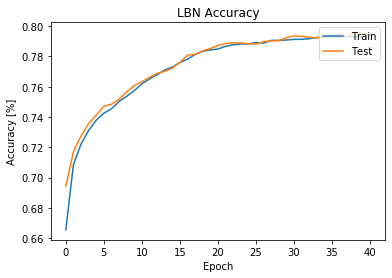

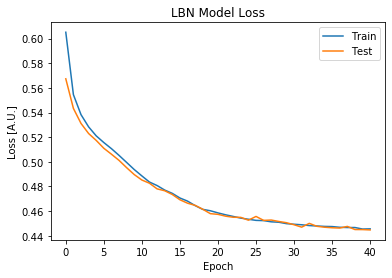

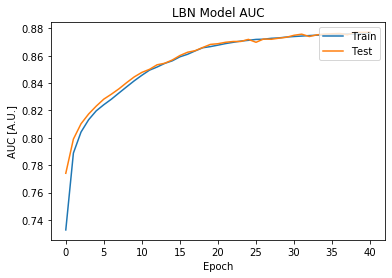

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step39/testPSO_v7_step39_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 11
nodesInSecondHiddenLayer = 8
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step39/testPSO_v7_step39.hdf5
Epoch 00036: early stopping


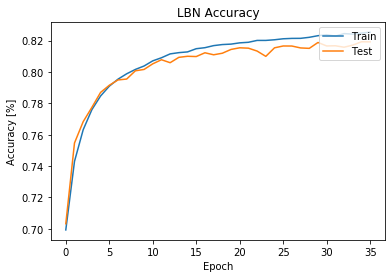

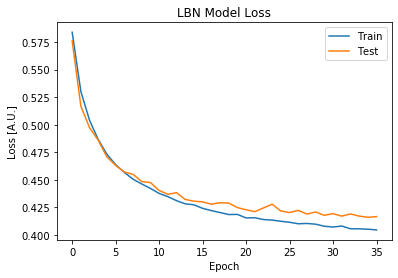

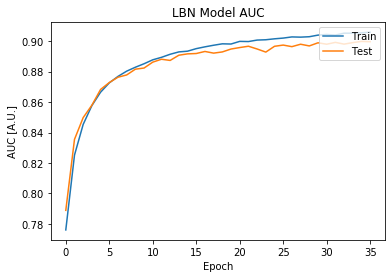

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step38/testPSO_v7_step38_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 95
nodesInSecondHiddenLayer = 121
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step38/testPSO_v7_step38.hdf5
(58608, 2)
(58608, 2)
++ Plotting test sample prediction results
23724 34884
++ Plotting test sample prediction results
23724 34884
Epoch 00045: early stopping


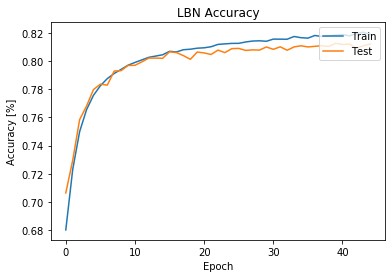

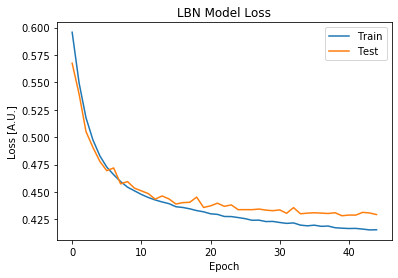

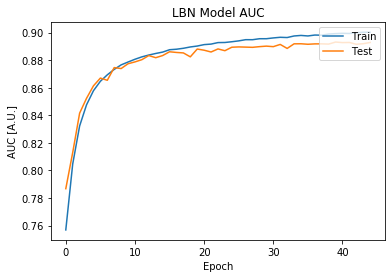

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step37/testPSO_v7_step37_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 101
nodesInSecondHiddenLayer = 65
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step37/testPSO_v7_step37.hdf5
(58608, 2)
Epoch 00046: early stopping


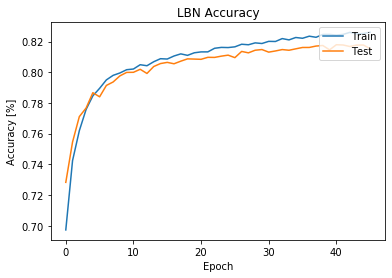

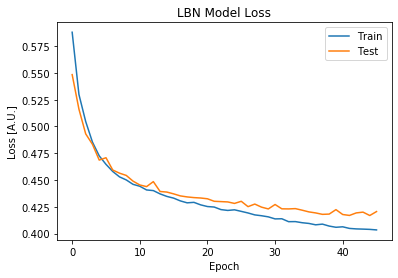

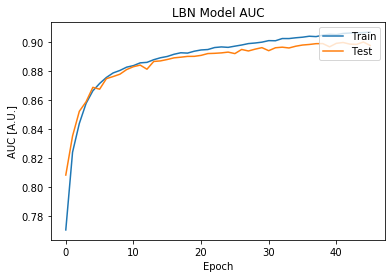

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step40/testPSO_v7_step40_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 98
nodesInSecondHiddenLayer = 98
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v7_step40/testPSO_v7_step40.hdf5
++ Plotting test sample prediction results
23724 34884
nSig = 1531.16 , nBkg = 1199666.19 with significance = 1.398 +/- 0.035 for LBN Signal Score score > 0.838
(58608, 2)


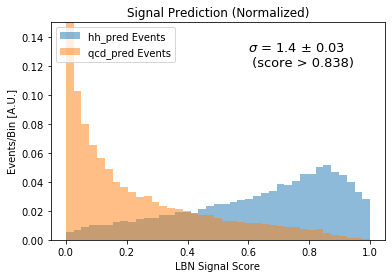

++ Making ROC curve


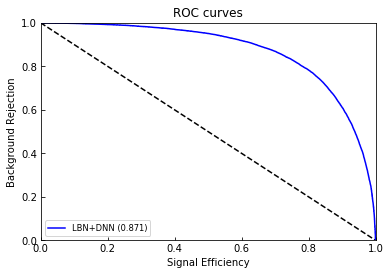

nSig = 1100.04 , nBkg = 368958.11 with significance = 1.811 +/- 0.075 for LBN Signal Score score > 0.919
++ Calculating best significance
23724 34884


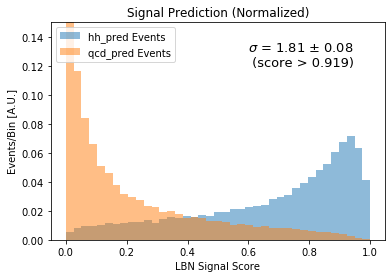

++ Plotting test sample prediction results
23724 34884
++ Making ROC curve


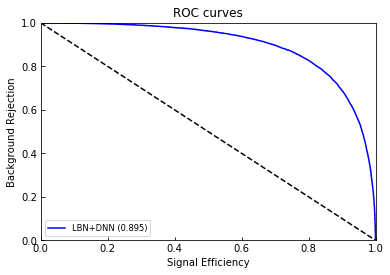

++ Calculating best significance
23724 34884
nSig = 1633.0 , nBkg = 963267.88 with significance = 1.664 +/- 0.045 for LBN Signal Score score > 0.889


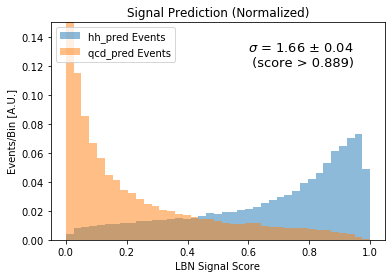

++ Making ROC curve


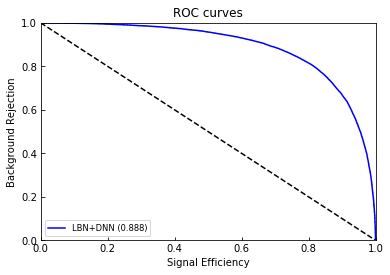

++ Calculating best significance
23724 34884
nSig = 1531.16 , nBkg = 1199666.19 with significance = 1.398 +/- 0.035 for ff-NN score > 0.838
nSig = 1123.28 , nBkg = 362330.12 with significance = 1.866 +/- 0.078 for LBN Signal Score score > 0.929


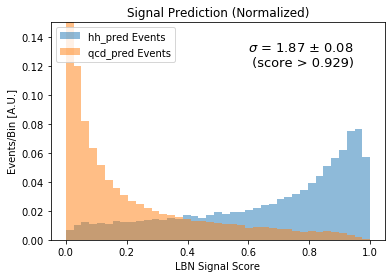

++ Making ROC curve
nSig = 1100.04 , nBkg = 368958.11 with significance = 1.811 +/- 0.075 for ff-NN score > 0.919


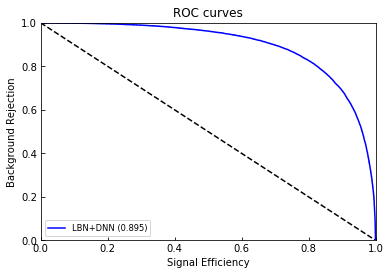

++ Calculating best significance
23724 34884
nSig = 1633.0 , nBkg = 963267.88 with significance = 1.664 +/- 0.045 for ff-NN score > 0.889
nSig = 1123.28 , nBkg = 362330.12 with significance = 1.866 +/- 0.078 for ff-NN score > 0.929


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.0984
2020-01-27 16:43:50,869 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.09841692447662354, best pos: [88.62989442 61.94891092]


In [7]:
%time
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}# can use grid search to get a better value of those parameters
#options = {'c1': 2.05, 'c2': 2.05, 'w': 0.7} # try this afterwards

param_name = ['nodesInFirstHiddenLayer','nodesInSecondHiddenLayer']
n_dimensions = len(param_name)
param_max_list = [200,200]
param_min_list = [0,0]
param_max = np.array(param_max_list)
param_min = np.array(param_min_list)
bounds = (param_min, param_max)

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=4, dimensions=n_dimensions, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(f_LBN_swarm, iters=10, n_processes=4)

2020-01-27 16:44:00,142 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-01-27 16:44:00,161 - matplotlib.animation - INFO - MovieWriter.run: running command: ['convert', '-size', '720x576', '-depth', '8', '-delay', '100.0', '-loop', '0', 'rgba:-', 'plotSwarm_hidddenDimNodes_testPSO_v7.gif']


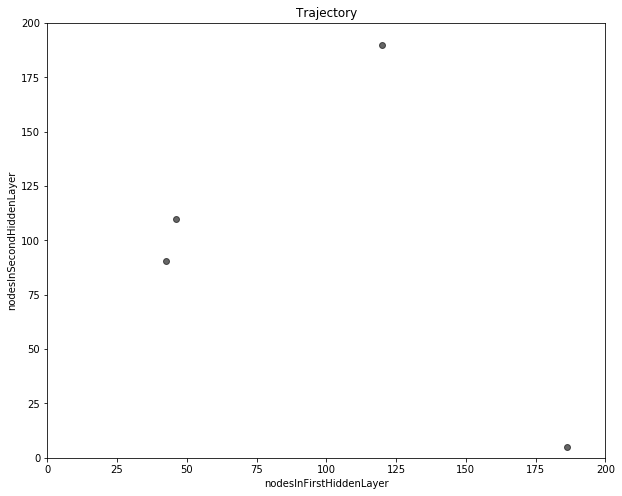

In [8]:
from IPython.display import Image
from pyswarms.utils.plotters.formatters import Mesher, Designer
d = Designer(limits=[(0,200), (0,200)],
             label=param_name
            )
animation = ps.utils.plotters.plot_contour(pos_history=optimizer.pos_history, designer=d)
gifName = 'plotSwarm_hidddenDimNodes_{}.gif'.format(userModelName)
animation.save( gifName, writer='imagemagick', fps=1)
Image(url= gifName)